# Creating a Data Science Workflow
In this project, we use data from Kaggle's Titanic competition to practice making a data science workflow.

## Loading the Data

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
%matplotlib inline

In [43]:
train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
train.shape

(891, 12)

## Cleaning the Data and Preparing Features

In [46]:
# %load functions.py 
# Here we load functions that we created during the lessons in this dataquest course. 
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name, drop_first=True)
    df = pd.concat([df,dummies],axis=1)
    return df

In [47]:
def apply_funcs(df):
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_cabin(df)
    df = process_titles(df)
    for col in ["Age_categories", "Fare_categories", "Title", "Cabin_type", "Sex"]:
        df = create_dummies(df, col)
    return df

In [48]:
train = apply_funcs(train)

In [49]:
holdout = apply_funcs(holdout)

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_categories,Fare_categories,Cabin_type,Title,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Fare_categories_12-50,Fare_categories_50-100,Fare_categories_100+,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T,Cabin_type_Unknown,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult,0-12,Unknown,Mr,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,50-100,C,Mrs,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult,0-12,Unknown,Miss,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult,50-100,C,Mrs,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult,0-12,Unknown,Mr,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1


## Exploring the 'Sibsp' and 'Parch' Columns

In [51]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [52]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [55]:
train[['Parch', 'SibSp']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Parch   891 non-null    int64
 1   SibSp   891 non-null    int64
dtypes: int64(2)
memory usage: 14.0 KB


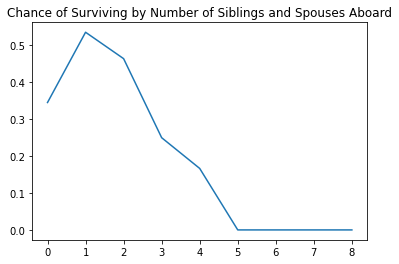

In [76]:
plt.plot(train.groupby('SibSp')['Survived'].mean())
plt.title('Chance of Surviving by Number of Siblings and Spouses Aboard')
plt.show()

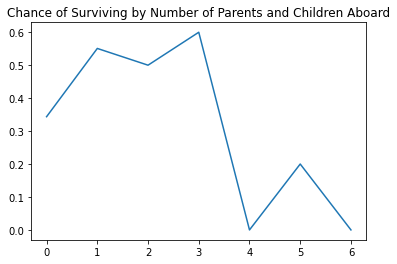

In [78]:
plt.plot(train.groupby('Parch')['Survived'].mean())
plt.title('Chance of Surviving by Number of Parents and Children Aboard')
plt.show()

Above, we see that survival chances were highest for those that had some family members aboard, but not too many. However, it is possible that these survival rates are really based on a different factor. For instance, the high survival rate for those with one sibling or spouse aboard could actually be because women had a high survival chance and most of the women aboard were married. 

In [79]:
train['family_size'] = train['Parch'] + train['SibSp']

In [84]:
train['family_size'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family_size, dtype: int64

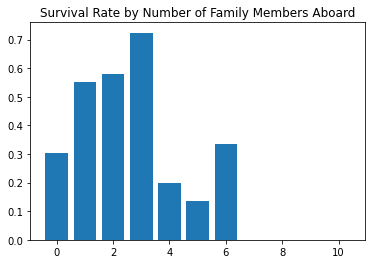

In [90]:
plt.bar(train.groupby('family_size')['Survived'].mean().index,train.groupby('family_size')['Survived'].mean())
plt.title('Survival Rate by Number of Family Members Aboard')
plt.show()

Above, we see that having family aboard generally increased the chance of surviving. This could a useful feature for the model, so we will add a dummy variable that measures if an individual was traveling with family. 

In [91]:
def make_alone_var(row):
    if row == 0:
        return 1
    else: 
        return 0

In [92]:
train['isalone'] = train['family_size'].apply(make_alone_var)

## Selecting Model Features

In [94]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   PassengerId                 891 non-null    int64   
 1   Survived                    891 non-null    int64   
 2   Pclass                      891 non-null    int64   
 3   Name                        891 non-null    object  
 4   Sex                         891 non-null    object  
 5   Age                         891 non-null    float64 
 6   SibSp                       891 non-null    int64   
 7   Parch                       891 non-null    int64   
 8   Ticket                      891 non-null    object  
 9   Fare                        891 non-null    float64 
 10  Embarked                    891 non-null    object  
 11  Age_categories              891 non-null    category
 12  Fare_categories             891 non-null    category
 13  Cabin_type          

In [111]:
def select_features(df):
    all_y = df['Survived']
    all_X = df.drop(['Survived','PassengerId'], axis=1)
    all_X = all_X.select_dtypes(exclude=['object', 'category'])
    rf = RandomForestClassifier(random_state=1)
    selector = RFECV(rf, cv=10)
    selector.fit(all_X, all_y)
    return all_X.columns[selector.support_]

In [109]:
best_features = select_features(train)

In [110]:
best_features

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Fare_categories_12-50',
       'Fare_categories_50-100', 'Fare_categories_100+', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Cabin_type_B',
       'Cabin_type_C', 'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_G',
       'Cabin_type_Unknown', 'Sex_male', 'family_size', 'isalone'],
      dtype='object')

## Selecting Model and Model Parameters

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [115]:
def select_model(df, features):
    all_X = df[features]
    all_y = df['Survived']
    model_list = [{
        'name': 'LogisticRegression',
        'estimator': LogisticRegression(),
        'hyperparams': { 
            "solver": ["newton-cg", "lbfgs", "liblinear"]
        }
    },{
        'name': "KNeighborsClassifier",
        "estimator": KNeighborsClassifier(),
        'hyperparams': {
            "n_neighbors": range(1,20,2),
            "weights": ["distance", "uniform"],
            "algorithm": ["ball_tree", "kd_tree", "brute"],
            "p": [1,2]
        }
    },{
        'name': "RandomForestClassifier",
        "estimator": RandomForestClassifier(),
        'hyperparams': {
            "n_estimators": [4, 6, 9],
            "criterion": ["entropy", "gini"],
            "max_depth": [2, 5, 10],
            "max_features": ["log2", "sqrt"],
            "min_samples_leaf": [1, 5, 8],
            "min_samples_split": [2, 3, 5]
        }       
    }]
    for model in model_list:
        print(model['name'])
        searcher = GridSearchCV(model['estimator'], param_grid=model['hyperparams'], cv=10)
        searcher.fit(all_X, all_y)
        model['best_estimator'] = searcher.best_estimator_
        model['best_params'] = searcher.best_params_
        model['best_score'] = searcher.best_score_
        print(model['best_params'])
        print(model['best_score'])
    return model_list

In [116]:
models = select_model(train, best_features)

LogisticRegression


/home/leo/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/leo/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

{'solver': 'newton-cg'}
0.8193508114856429
KNeighborsClassifier
{'algorithm': 'brute', 'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
0.768888888888889
RandomForestClassifier
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 6}
0.8361797752808989


In [117]:
models

[{'name': 'LogisticRegression',
  'estimator': LogisticRegression(),
  'hyperparams': {'solver': ['newton-cg', 'lbfgs', 'liblinear']},
  'best_estimator': LogisticRegression(solver='newton-cg'),
  'best_params': {'solver': 'newton-cg'},
  'best_score': 0.8193508114856429},
 {'name': 'KNeighborsClassifier',
  'estimator': KNeighborsClassifier(),
  'hyperparams': {'n_neighbors': range(1, 20, 2),
   'weights': ['distance', 'uniform'],
   'algorithm': ['ball_tree', 'kd_tree', 'brute'],
   'p': [1, 2]},
  'best_estimator': KNeighborsClassifier(algorithm='brute', n_neighbors=13, p=1, weights='distance'),
  'best_params': {'algorithm': 'brute',
   'n_neighbors': 13,
   'p': 1,
   'weights': 'distance'},
  'best_score': 0.768888888888889},
 {'name': 'RandomForestClassifier',
  'estimator': RandomForestClassifier(),
  'hyperparams': {'n_estimators': [4, 6, 9],
   'criterion': ['entropy', 'gini'],
   'max_depth': [2, 5, 10],
   'max_features': ['log2', 'sqrt'],
   'min_samples_leaf': [1, 5, 8],


## Conclusion 

Above, we see that the best model is the random forest, which results in an accuracy of approximately 83.6%.